<a href="https://colab.research.google.com/github/seanjparker/CognativeRoboticsLab/blob/master/CogRoboLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN for CIFAR-10**

__CIFAR-10__ see https://www.cs.toronto.edu/~kriz/cifar.html.
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [1]:
%tensorflow_version 1.13  # use previous version

# importing of modules for CIFAR-10 CNN 
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.13  # use previous version`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [0]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [3]:
#load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 
# convert to categorical
y_train = np_utils.to_categorical(y_train, N_CLASSES)
y_test = np_utils.to_categorical(y_test, N_CLASSES) 

# float and normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

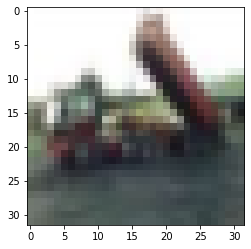

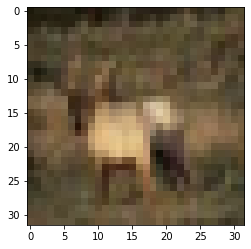

In [4]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 2
image = x_train[Selected_Image]
plt.imshow(image)
plt.show() 

Selected_Image = 3
image = x_train[Selected_Image]
plt.imshow(image)
plt.show() 





A deeper CNN
-------------

To improve the performance of the network on the CIFAR-10 dataset, it is possible to use a deeper CNN, with a chain of multiple convolution and pooling layers.
The following network will be used:

conv+conv+maxpool+dropout+conv+conv+maxpool

The final classification layers will use the standard:

dense+dropout+dense

All the layers will use the reLu function, except the final one with the Softmax function necessary for the categorical classification 


In [4]:
N_EPOCH = 40 # bigger network will benefit from extra training epochs
WEIGHT_DECAY = 1e-4
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', kernel_regularizer=l2(WEIGHT_DECAY), input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same', kernel_regularizer=l2(WEIGHT_DECAY)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=3, padding='same', kernel_regularizer=l2(WEIGHT_DECAY)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same', kernel_regularizer=l2(WEIGHT_DECAY)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=3, padding='same', kernel_regularizer=l2(WEIGHT_DECAY)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same', kernel_regularizer=l2(WEIGHT_DECAY)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(N_CLASSES, activation='softmax'))

#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        12

Data Augmentation
-------------

To further improve the performance of the model, it is advisable to use a larger training set, to expose the network to more variations of the images.
One way to achieve this, without having to collect new images from the real world, is to __augment__ the existing images with multiple types of transformations of the dataset stimuli. This can include rotation of the image, rescaling, horizontal/vertical flip, zooming, channel shift, etc.

Below is an example of the code that augments the current datase.




In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=VALIDATION_SPLIT
    )

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [6]:

#fit the dataset
datagen.fit(x_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE), steps_per_epoch=x_train.shape[0], epochs=N_EPOCH, verbose=VERBOSE)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40
    5/50000 [..............................] - ETA: 22:05:09 - loss: 4.6073 - acc: 0.1750

KeyboardInterrupt: ignored

__Save the model__

Saves the model in the .h5 format and also saves the network architecture as JSON

In [0]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

NameError: ignored

**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.

10000/10000 [==============================] - 1s 82us/step

Test score/loss: 0.6137130602359772
Test accuracy: 0.8422
dict_keys(['loss', 'acc'])


KeyError: ignored

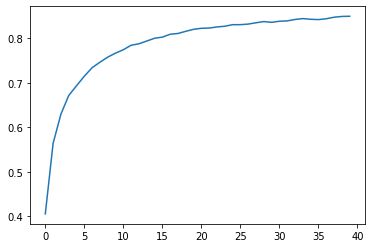

In [0]:
#Testing
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

